# King County Housing Guide

## Introduction

We have been approached by a real estate company about how to accurately appraise homes in King County so that they can give their customers accurate reccomendations when it comes to buying and selling homes. We've been given a data set that contains various information about the different homes within King County. Our goal here is to be able to give a breakdown of features that ultimately adds values to their homes.

## Cleaning the Data

First step is to import and clean all the data so we have a data set that we're able to use for linear regression.

In [1]:
#importing all different libraries that we'll use for our analysis.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from matplotlib.ticker import FuncFormatter
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We can see that there are NaN/null values in waterfront, view and yr_renovated columns. We have to think about dealing with these columns given our model will not run with any null values.

In [4]:
# for now we are converting all the Nulls with the the '0', or 'NO', or 'NONE' of their respective columns
# because they are overwhelmingly the most common value, so we think it's a safe assumption.

df['waterfront'] = df['waterfront'].fillna('NO')
df['yr_renovated'].fillna(0.0, inplace=True)
df['view'].fillna('NONE', inplace=True)

In [5]:
# We simply convert the yes or no values to 1 and 0 respectively.
waterfront = preprocessing.LabelEncoder()
x1 = list(df['waterfront'])


waterfront.fit(x1)
waterfront_list = waterfront.transform(x1)
df['waterfront'] = waterfront_list
df['waterfront'].value_counts()


# 0 is NO WATERFRONT
# 1 is YES WATERFRONT

0    21451
1      146
Name: waterfront, dtype: int64

In [6]:
# Take apart the date column, put it in to three columns as day month and year and have the values numeric.
df['date'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date'].map(lambda x: x.day)
df['month_sold'] = df['date'].map(lambda x: x.month)
df['year_sold'] = df['date'].map(lambda x: x.year)
df.drop('date', axis=1, inplace=True)

In [7]:
## Creating numerical values from categorical data.

df.view.replace({'NONE': 0, 'AVERAGE': 2, 'FAIR': 1, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

df.condition.replace({'Poor': 1, 'Average': 3, 'Fair': 2, 'Good': 4, 'Very Good': 5}, inplace=True)

df.grade.replace({'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10,
                       '11 Excellent': 11, '5 Fair': 5, '12 Luxury': 12, '13 Mansion': 13, '3 Poor': 3,
                        '4 Low': 4}, inplace=True)

In [8]:
# Convert all the ? values to 0.0 like we did for the other columns.
# Then convert the values from strings to int

df['sqft_basement'] = df["sqft_basement"].replace({"?": '0.0'})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

WOOHOO! We now have a data set that contains only data in a numeric form which is a great step in getting ready for linear regression. Time to plug this data into different models to see how we can predict the price given certain house features.

## Basline Model

We will first create a baseline model using all of the available data and the average house price. This is a good starting point to be able to compare our future models to.

In [10]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)

In [11]:
baseline = DummyRegressor()
baseline.fit(X_train, y_train)
baseline.score(X_test, y_test)

print("Our R-squared on the testing set is:", baseline.score(X_test, y_test))

Our R-squared on the testing set is: -0.0002252015545449737


In [12]:
error = baseline.predict(X_test)-y_test
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print('This is the RMSE:', sqr_mean_sqr_errors)


This is the RMSE: 390385.8702981889


We see that our baseline score, which is from always predicting the average price is very low.
Let's start trying to make real predictions using a Linear regressionon all the data. Our RMSE, which is super important for this project given our price predictions.

### Creating a Simple Model

It's first somewhat important to create a simple model of just two variables where we're choosing the independent variable based on the correlation to the dependendent variable, price. We can create a correlation heatmap to show us this information.

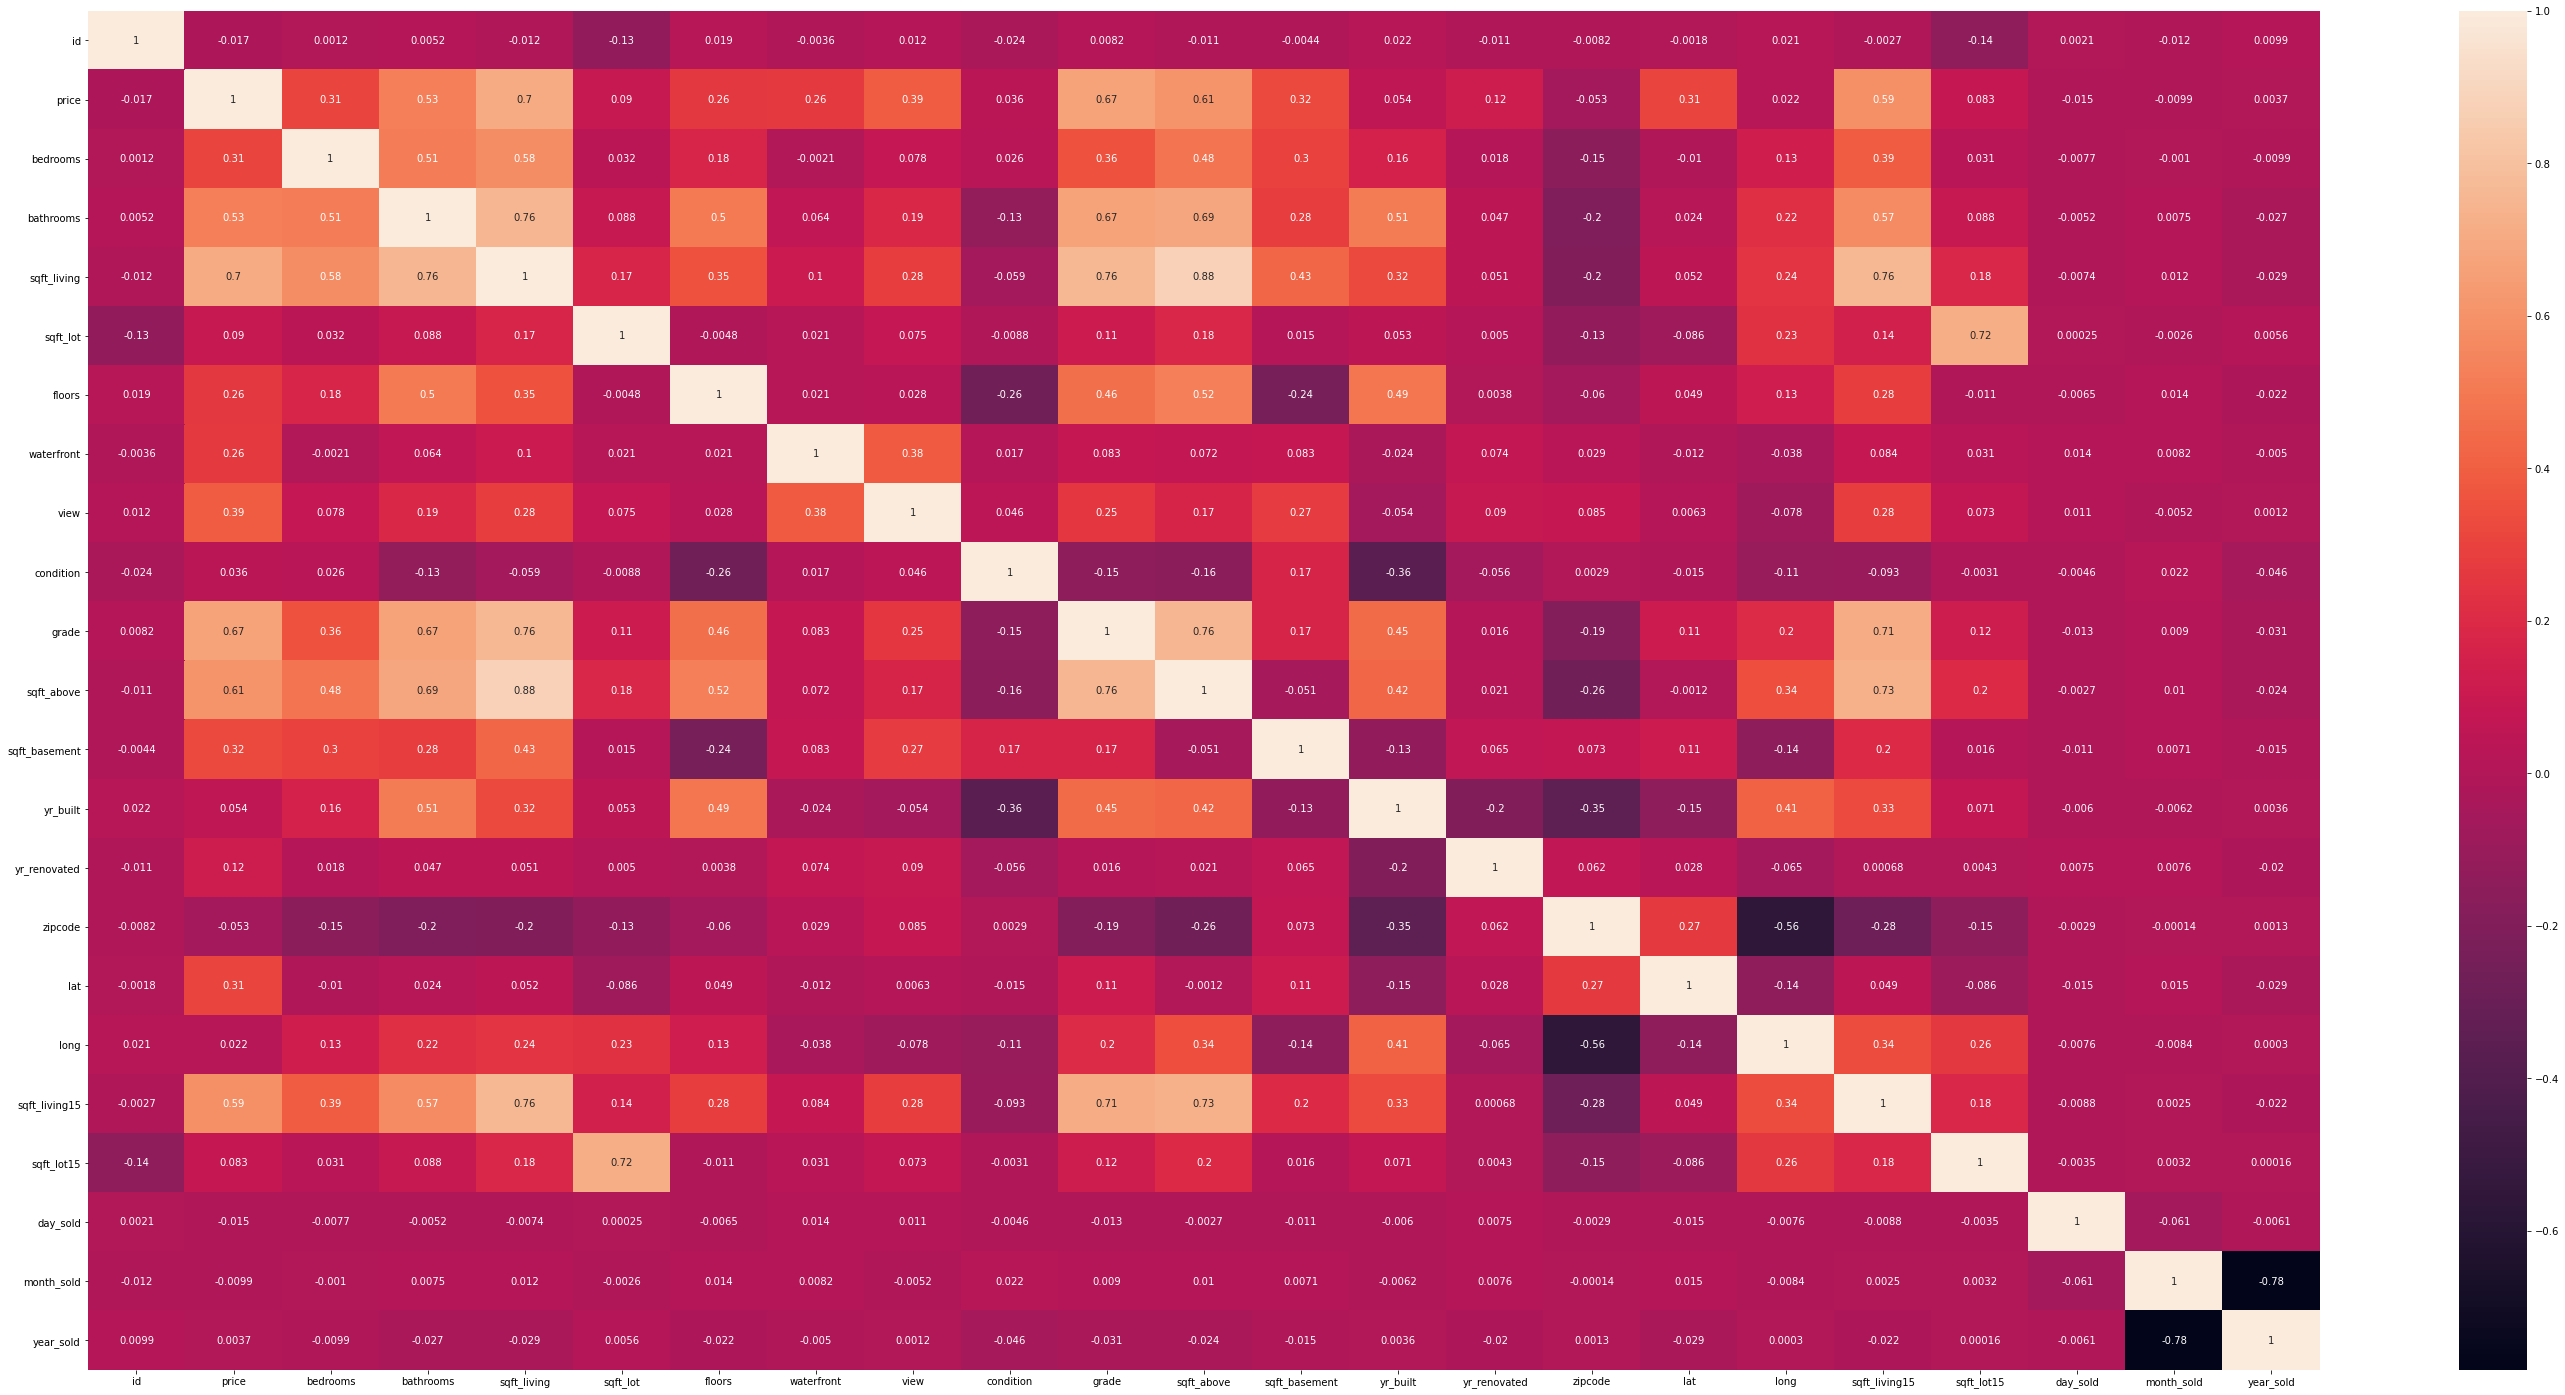

In [13]:
df.corr()
plt.figure(figsize=(50, 25))
sns.heatmap(data=df.corr(), annot=True);

In this case and while the graph is super small, we can see that price and sqft_living columns have the highest correlation. For that, we'll create a simple model based on this.

In [14]:
formula_simple = 'price ~ sqft_living'
model = ols(formula=formula_simple, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:57:59   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
x_simple= df[['sqft_living']]
y_simple= df['price']

x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x_simple, y_simple, random_state=100)

lr=LinearRegression()
lr.fit(x_train_simple, y_train_simple)
print("Our R-squared on the testing set is:", lr.score(x_test_simple, y_test_simple))
print("Our R-squared on the training set is:", lr.score(x_train_simple, y_train_simple))

Our R-squared on the testing set is: 0.48733518973535617
Our R-squared on the training set is: 0.4945445156766466


In [16]:
error = lr.predict(x_test_simple)-y_test_simple
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print('This is the RMSE:', sqr_mean_sqr_errors)

This is the RMSE: 279487.2162346182


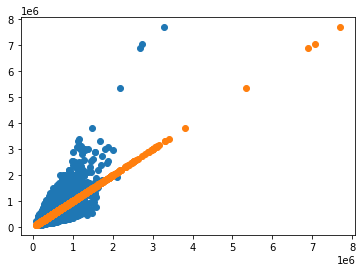

In [17]:
ypred = lr.predict(x_test_simple)
plt.scatter((ypred) , (y_test_simple))
plt.scatter((y_test_simple),(y_test_simple));

As we can see, our simple model has improved significantly from our baseline model however we're still not happy or comfortable with giving recommedations off of this data. Time to try a different approach by looking at all values and determining which affect price the most.

## Trying to determine the statistically significant values

In [18]:
outcome = 'price'
predictors = df.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2308.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:57:59   Log-Likelihood:            -2.9432e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21574   BIC:                         5.889e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.682e+07   9.97e+06     -6.701      0.000   -8.64e+07   -4.73e+07
id            -1.348e-06   4.81e-07     -2.801      0.005   -2.29e-06   -4.05e-07
bedrooms      -3.611e+04   1895.453    -19.050      0.000   -3.98e+04   -3.24e+04
bathrooms      4.185e+04   3253.776     12.862      0.000    3.55e+04    4.82e+04
sqft_living     103.7644     18.027      5.756      0.000      68.431     139.098
sqft_lot          0.1177      0.048      2.459      0.014       0.024       0.211
floors         7644.5741   3591.351      2.129      0.033     605.261    1.47e+04
waterfront     6.188e+05   1.81e+04     34.212      0.000    5.83e+05    6.54e+05
view           5.316e+04   2117.328     25.109      0.000     4.9e+04    5.73e+04
condition      2.807e+04   2344.433     11.971      0.000    2.35e+04    3.27e+04
grade          9.726e+04   2155.477     45.122      0.000     9.3e+04    1.01e+05
sqft_above       77.0668     18.018      4.277      0.000      41.750     112.383
sqft_basement    46.9048     17.858      2.627      0.009      11.902      81.908
yr_built      -2639.9001     71.732    -36.802      0.000   -2780.500   -2499.300
yr_renovated     24.4748      3.968      6.169      0.000      16.698      32.252
zipcode        -584.8168     32.901    -17.775      0.000    -649.306    -520.328
lat            6.027e+05   1.07e+04     56.260      0.000    5.82e+05    6.24e+05
long          -2.156e+05   1.31e+04    -16.405      0.000   -2.41e+05    -1.9e+05
sqft_living15    21.5470      3.441      6.262      0.000      14.802      28.292
sqft_lot15       -0.4007      0.073     -5.464      0.000      -0.544      -0.257
day_sold       -360.8721    159.163     -2.267      0.023    -672.843     -48.902
month_sold     1130.0414    708.768      1.594      0.111    -259.197    2519.280
year_sold      3.657e+04   4721.636      7.746      0.000    2.73e+04    4.58e+04
==============================================================================
Omnibus:                    18405.094   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1877386.440
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.112   Cond. No.                     3.95e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
lr = LinearRegression()

lr.fit(X_train, y_train)
print("Our R-squared on the testing set is:", lr.score(X_test, y_test))
print("Our R-squared on the training set is:", lr.score(X_train, y_train))

Our R-squared on the testing set is: 0.6866354619291327
Our R-squared on the training set is: 0.706998573878783


In [20]:
y_pred = lr.predict(X_test)
error=y_pred-y_test
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

47746356438.41882
218509.3966821995


Right off the bat we can see this is a better model than our first simple model. However, it still has a very large error and many of these factors do not satisfy the assumptions of our linear regression. 

The next step would be to narrow our variables down to the ones that, first of all have a linear relationship with price, and then check to see if all the assumptions are met. It also makes sense to remove the biggest outliers so that our model doesn't overfit.

## Removing Outliers

We decided to use two standard deviations from the mean to remove any outliers in our data set. Given how linear regression views outliers and the extremely negative impact it can have on the results, we decided that the best way to remove these types of data points were to look at the bedrooms and sqft_living columns.
Our best approach here was to remove any data points that were outside of 2 standard deviations. This would give us 95% of the data surrounding the mean. We believe that this would give us a better set and allow our linear regression model to perform better.

In [21]:
print("Our data before removing outliers: ", df['bedrooms'].describe())
print("Our data before removing outliers: ", df['sqft_living'].describe())

df = df [df['bedrooms'] < 5.226884]
df = df [df['bedrooms'] > 1.52]


df = df[df['sqft_living'] < 3916.2]
df = df[df['sqft_living'] > 244.2]
print("Our data after removing outliers: ", df['bedrooms'].describe())
print("Our data after removing outliers: ", df['sqft_living'].describe())

Our data before removing outliers:  count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64
Our data before removing outliers:  count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
Our data after removing outliers:  count    20259.000000
mean         3.312009
std          0.785984
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: bedrooms, dtype: float64
Our data after removing outliers:  count    20259.000000
mean      1967.846241
std        721.339687
min        440.000000
25%       1410.000000
50%       1870.000000
75%       2440.000000
max       3915.000000
Name: sqft_living, dtype: float64


## Checking  for linearity between price and independent variables

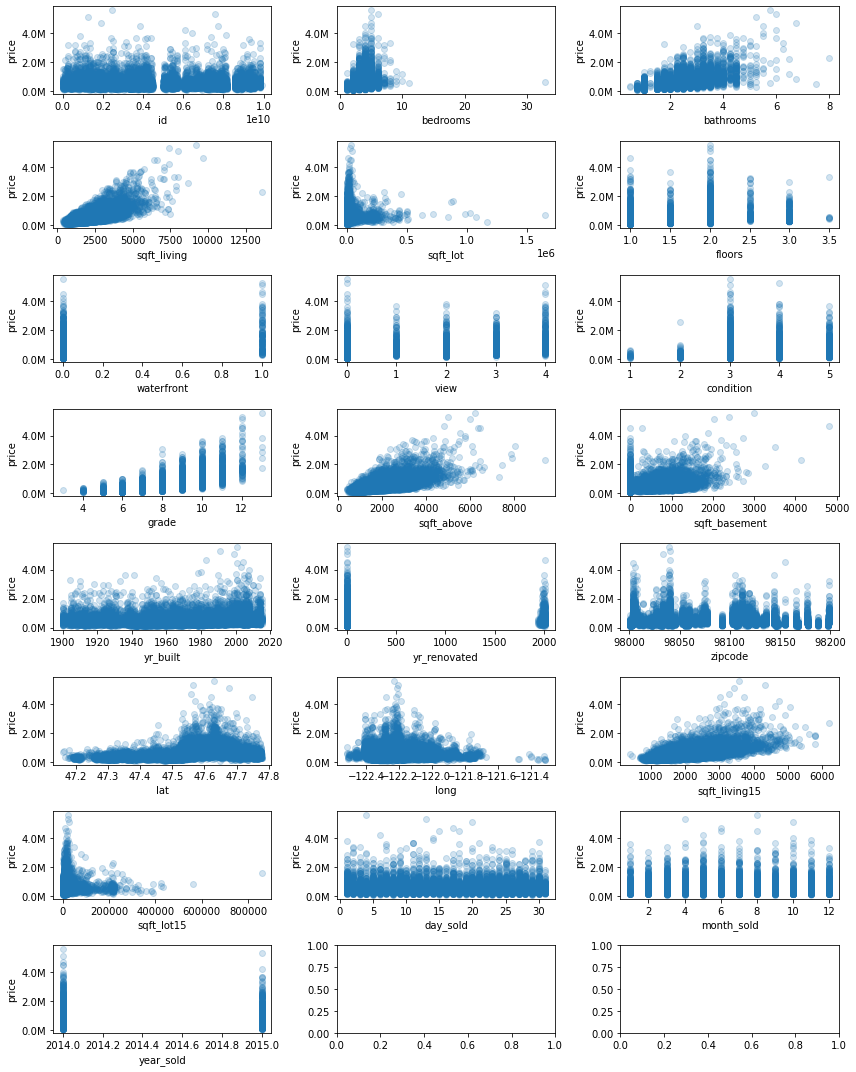

In [22]:
# Used in converting x and y axis ticks.

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(12, 15))
fig.set_tight_layout(True)

for index, col in enumerate(X_train.columns):
    ax = axes[index//3][index%3]
    ax.yaxis.set_major_formatter(formatter)
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

From the above graphs, we can see that the following variables have a linear relationship to price.
* sqft_living15
* grade
* sqft_above
* sqft_living
* bathrooms

We can drop the remainder of these columns given that they do not follow the one of the assumptions we need to make for linear regression.

In [23]:
linear_df = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'price']]

 ## Checking for Collinearity

In [24]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

corr_df=linear_df.drop('price', axis=1).corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc4']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.cc4>.75) & (corr_df.cc4 <1)]

,cc4
pairs,
"(sqft_living, sqft_above)",0.838949


Looks like we only need to drop sqft_above and we will have variables that are linear with price and not correlated with each other.

In [25]:
non_colin_df = linear_df.drop(['sqft_above'], axis=1)

After removing outliers, let's see how strongly correlated our final variables are to price. 

In [26]:
keys = list(non_colin_df.corr()['price'].sort_values(ascending=False).index)
keys[1] = 'Construction Grade'
keys[2] = 'Square Footage'
keys[3] = 'Surrounding Homes Size'
keys[4] = 'Bathrooms'
values = list(non_colin_df.corr()['price'].sort_values(ascending=False))

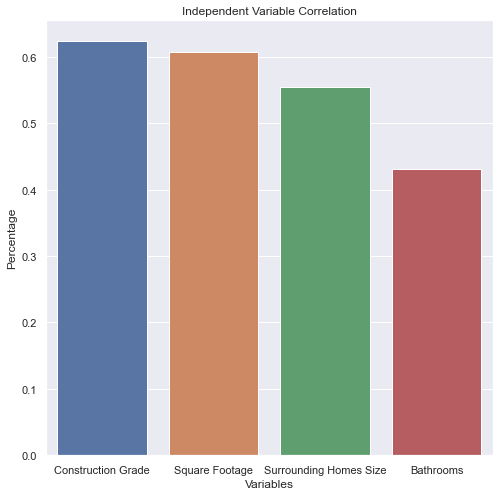

In [27]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(x=keys[1:], y=values[1:]).set(title='Independent Variable Correlation', xlabel='Variables', ylabel='Percentage');


# Inferential Model

In [28]:
X2 = non_colin_df.drop('price', axis=1)
y2 = non_colin_df['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, random_state=100)

outcome = 'price'
predictors = X2_train
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
inferntial_model = ols(formula=formula, data=non_colin_df).fit()
inferntial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     4192.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:58:09   Log-Likelihood:            -2.7576e+05
No. Observations:               20259   AIC:                         5.515e+05
Df Residuals:                   20254   BIC:                         5.516e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.895e+05   1.13e+04    -43.235      0.000   -5.12e+05   -4.67e+05
sqft_living     114.6699      3.548     32.322      0.000     107.716     121.624
grade          9.594e+04   2047.342     46.860      0.000    9.19e+04       1e+05
sqft_living15    50.9156      3.543     14.370      0.000      43.971      57.860
bathrooms     -2.903e+04   2933.636     -9.895      0.000   -3.48e+04   -2.33e+04
==============================================================================
Omnibus:                     8447.483   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67836.729
Skew:                           1.807   Prob(JB):                         0.00
Kurtosis:                      11.204   Cond. No.                     2.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the coefficients from this model, we can see that the addition of a square foot of a home on average will increase the sale price by 114 dollars. When the average square footage of the 15 surrounding neighbors increases, we expect that the price to increase 51 dollars per square foot added.


Bathrooms, interestingly enough, have a negative correlation. The explanation for this may be, that because the model takes in to acount the square footage, it wants to figure out how bathrooms impact the price given that it's a big home. In that case it's is possible that homes that are very big and therefore expensive don't have higher prices when there are more bathrooms.

With regards to grade being that is isn't a continuous variable, we can't use the coefficient that shows up in our model as an accurate number.

Instead let's split up the data into three parts: below average grade, average grade, and above average grade. Let's see what the average prices are in each part.

In [29]:
low_grade_df = non_colin_df[non_colin_df['grade']<6]
average_grade_df = non_colin_df[(non_colin_df['grade']>5) & (non_colin_df['grade']<9)]
high_grade_df = non_colin_df[non_colin_df['grade']>8]

In [30]:
low_average = low_grade_df['price'].mean()
print(low_average)
average_average = average_grade_df['price'].mean()
print(average_average)
high_average = high_grade_df['price'].mean()
print(high_average)

245176.64055299538
437880.26031345705
823880.8681026852


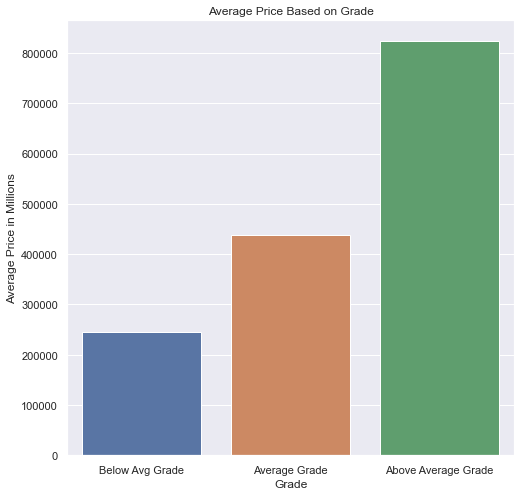

In [31]:
grade_values = [low_average, average_average, high_average]
grade_keys = ['Below Avg Grade', 'Average Grade', 'Above Average Grade']
sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(x=grade_keys, y=grade_values).set(title='Average Price Based on Grade', xlabel='Grade', ylabel='Average Price in Millions');

As far as inference goes, we can say that adding sqaure footage to your home will add 115 dollars per square foot, increasing the average size of surrounding homes size will add 50 dollars per sqft, and having an above average construction grade is correlated with an average price of close to a million dollars! 

We'll now work on getting the most accurate prediction possible.

## Standard Scaling the Data

In [32]:
non_colin_df_4 = non_colin_df.drop('price', axis=1)
price_df = non_colin_df['price']

#create standard scaler
ss = StandardScaler()
ss.fit(non_colin_df_4)

stand_scale = ss.transform(non_colin_df_4)

In [33]:
scaled_df_noncolin = pd.DataFrame(stand_scale, columns=non_colin_df_4.columns)

scaled_df_noncolin.reset_index(drop=True, inplace=True)
scaled_df_noncolin.reset_index(drop=True, inplace=True)
price_df.reset_index(drop=True, inplace=True)
price_df.reset_index(drop=True, inplace=True)

In [34]:
scaled_data = pd.concat((price_df, scaled_df_noncolin), axis=1)
scaled_data


,price,sqft_living,grade,sqft_living15,bathrooms
0,221900.0,-1.092226,-0.542506,-0.968677,-1.535441
1,538000.0,0.834792,-0.542506,-0.394522,0.291795
2,180000.0,-1.660627,-1.507867,1.295137,-1.535441
3,604000.0,-0.010878,-0.542506,-0.935869,1.388137
4,510000.0,-0.399054,0.422855,-0.214073,-0.073652
...,...,...,...,...,...
20254,360000.0,-0.607005,0.422855,-0.656993,0.657242
20255,400000.0,0.474343,0.422855,-0.164859,0.657242
20256,402101.0,-1.314041,-0.542506,-1.493620,-1.900888
20257,400000.0,-0.509961,0.422855,-0.853846,0.657242


## Model after Standard Scaling

In [35]:
X3 = scaled_data.drop('price', axis=1)
y3 = scaled_data['price']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, random_state=100)

outcome = 'price'
predictors = X3_train
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
final_model = ols(formula=formula, data=scaled_data).fit()
final_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     4192.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:58:10   Log-Likelihood:            -2.7576e+05
No. Observations:               20259   AIC:                         5.515e+05
Df Residuals:                   20254   BIC:                         5.516e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.004e+05   1386.737    360.838      0.000    4.98e+05    5.03e+05
sqft_living    8.271e+04   2559.060     32.322      0.000    7.77e+04    8.77e+04
grade          9.938e+04   2120.804     46.860      0.000    9.52e+04    1.04e+05
sqft_living15  3.104e+04   2159.855     14.370      0.000    2.68e+04    3.53e+04
bathrooms     -1.986e+04   2006.881     -9.895      0.000   -2.38e+04   -1.59e+04
==============================================================================
Omnibus:                     8447.483   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67836.729
Skew:                           1.807   Prob(JB):                         0.00
Kurtosis:                      11.204   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

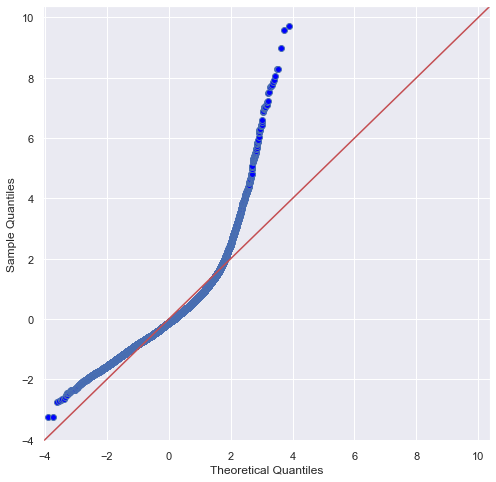

In [36]:
## Creating a QQ Plot

resid = final_model.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

In [37]:
lr = LinearRegression()
lr.fit(X3_train, y3_train)
print('The training set score is :', lr.score(X3_train, y3_train))
print('The test set score is :', lr.score(X3_test, y3_test))

The training set score is : 0.4534028549702446
The test set score is : 0.4511600877483032


In [38]:
error = lr.predict(X3_test)-y3_test
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

37656664856.43541
194053.25263039372


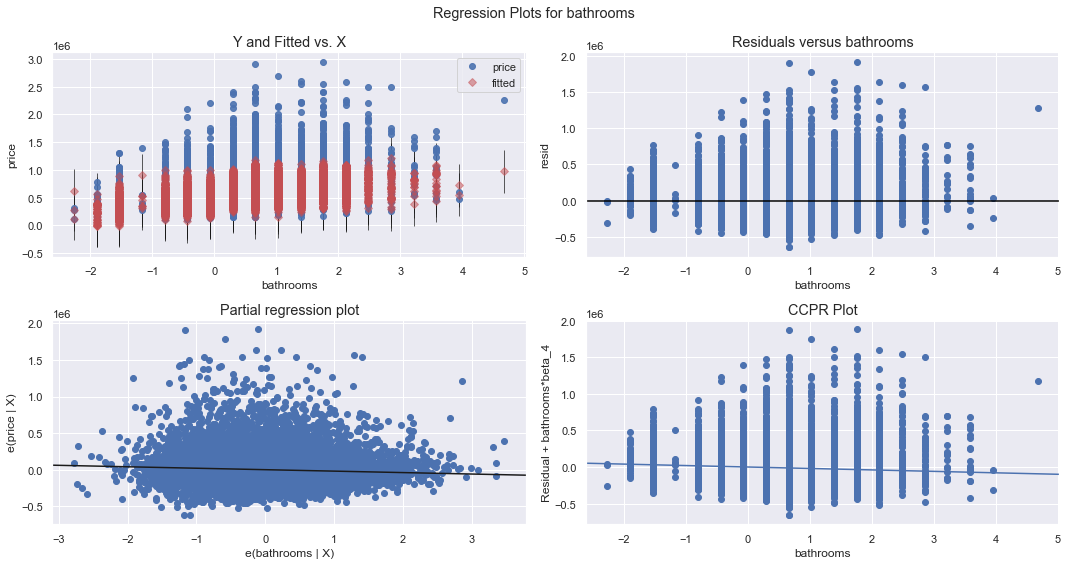

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "bathrooms", fig=fig)
plt.show()

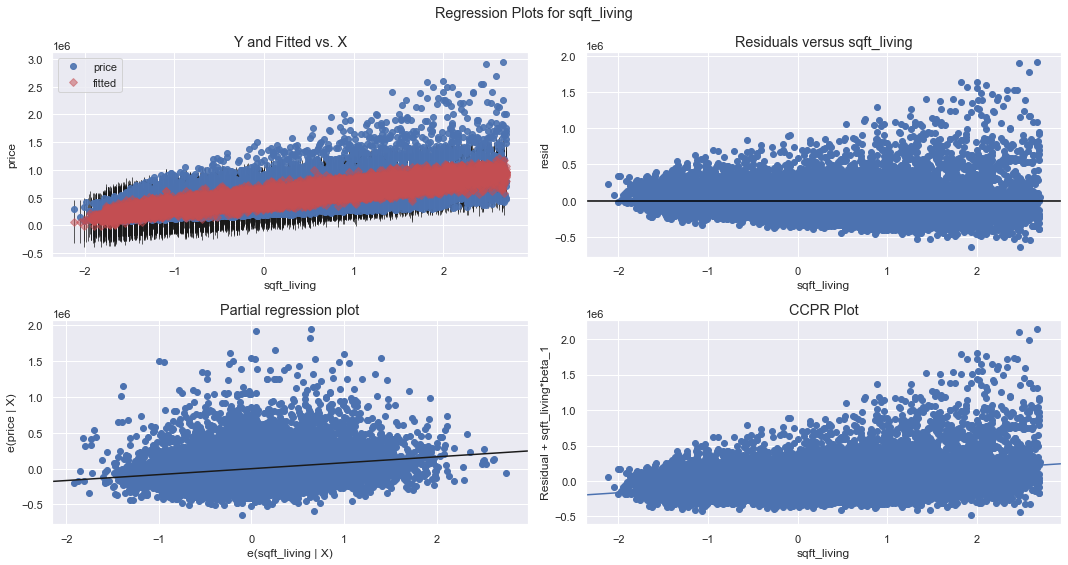

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "sqft_living", fig=fig)
plt.show()

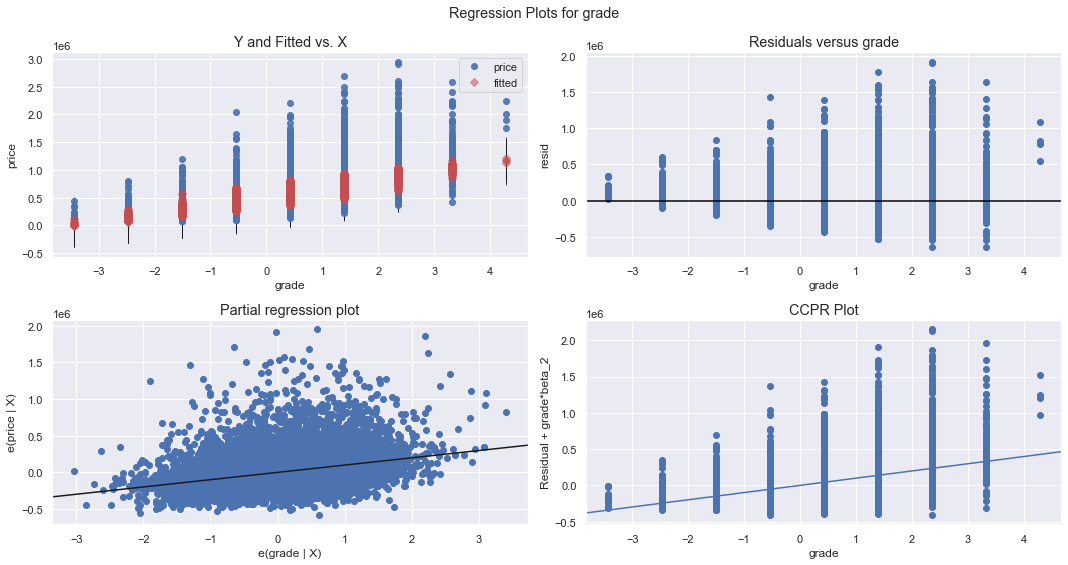

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "grade", fig=fig)
plt.show()

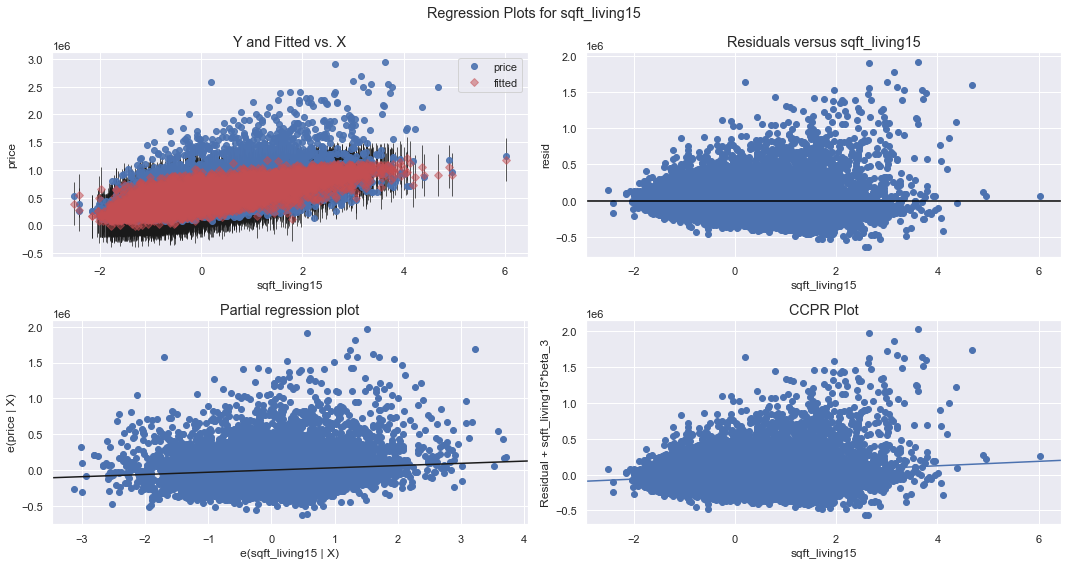

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "sqft_living15", fig=fig)
plt.show()

This model isn't great given that we're violating a fair amount of the assumptions for linear regression. First of all, we can see from the QQ plot that the distribution of the errors is non-normal. We can also see that the residuals of the independent variables do not follow the homoscedasticity assumption.




## FINAL WORKBOOK

Let's try logging our price so that we can see if the data is more normally scaled.

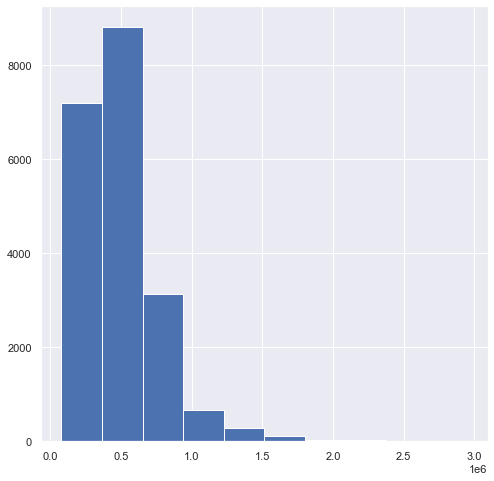

In [43]:
plt.hist(df['price']);

We can see from this graph this OBVIOUSLY isn't normally distributed and will cause a massive problem for our linear regression models. 

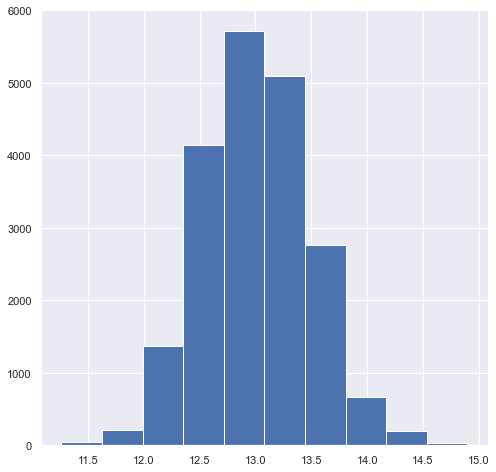

In [44]:
plt.hist(np.log(df['price']));

WOO. This looks great. Let's now log the price in our data frame and run our final model!!

In [45]:
# LOGGING PRICE

scaled_data['log_price'] = np.log(scaled_data['price'])

X4 = scaled_data.drop(['price','log_price'], axis=1)
y4 = scaled_data['log_price']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, random_state=100)

outcome = 'log_price'
predictors = X4_train
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
final_model = ols(formula=formula, data=scaled_data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     4629.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:58:26   Log-Likelihood:                -7255.2
No. Observations:               20259   AIC:                         1.452e+04
Df Residuals:                   20254   BIC:                         1.456e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0053      0.002   5346.654      0.000      13.001      13.010
sqft_living       0.1451      0.004     32.318      0.000       0.136       0.154
grade             0.1807      0.004     48.586      0.000       0.173       0.188
sqft_living15     0.0504      0.004     13.291      0.000       0.043       0.058
bathrooms        -0.0145      0.004     -4.123      0.000      -0.021      -0.008
==============================================================================
Omnibus:                       71.215   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.970
Skew:                           0.079   Prob(JB):                     5.76e-14
Kurtosis:                       2.782   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
lr.fit(X4_train, y4_train)
lr.score(X4_test, y4_test)

0.46881386283634763

In [47]:
lr.score(X4_train, y4_train)

0.48042049590982905

Unfortunately our model didn't perform how we'd expect given the difference between train and test, however let's take a look at the RMSE to see if that has improved.

Let's take a look at the assumptions one last time to make sure this model is valid.

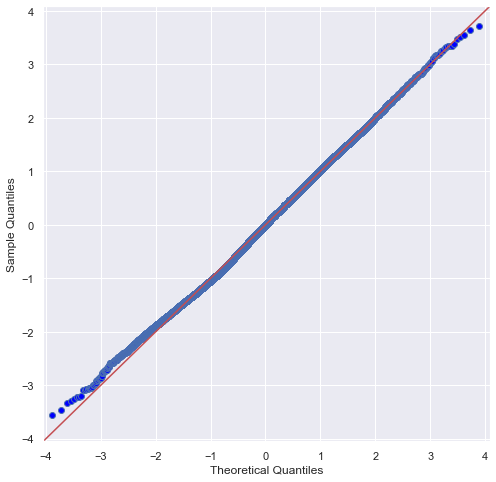

In [48]:
resid = final_model.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

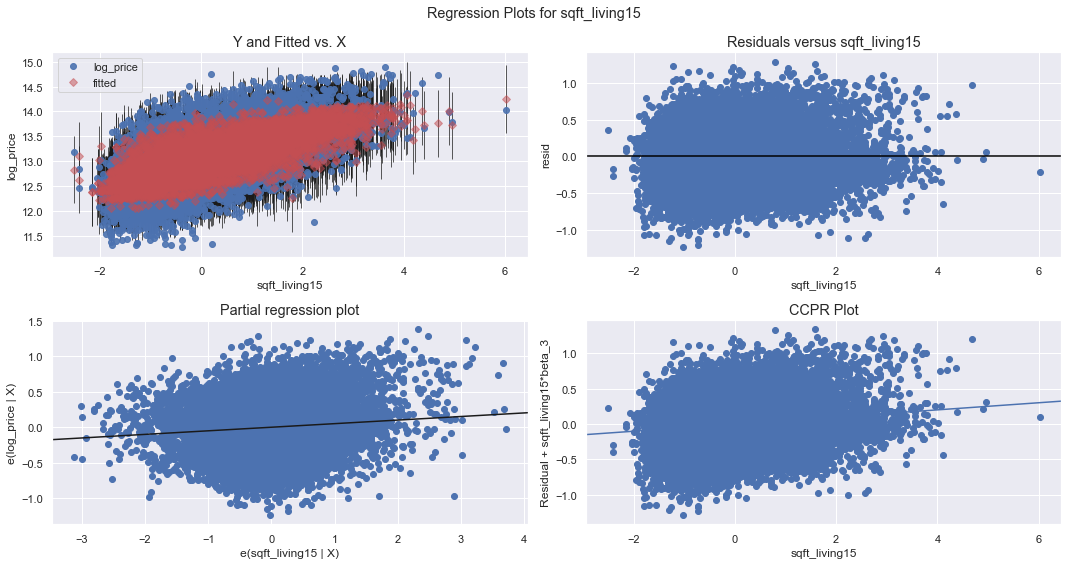

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "sqft_living15", fig=fig)
plt.show()

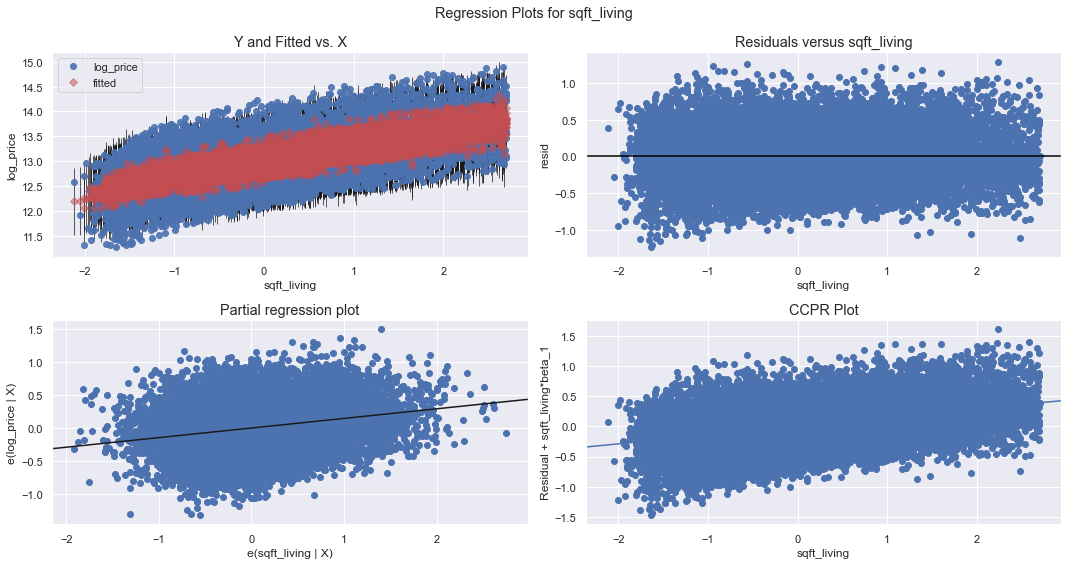

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "sqft_living", fig=fig)
plt.show()

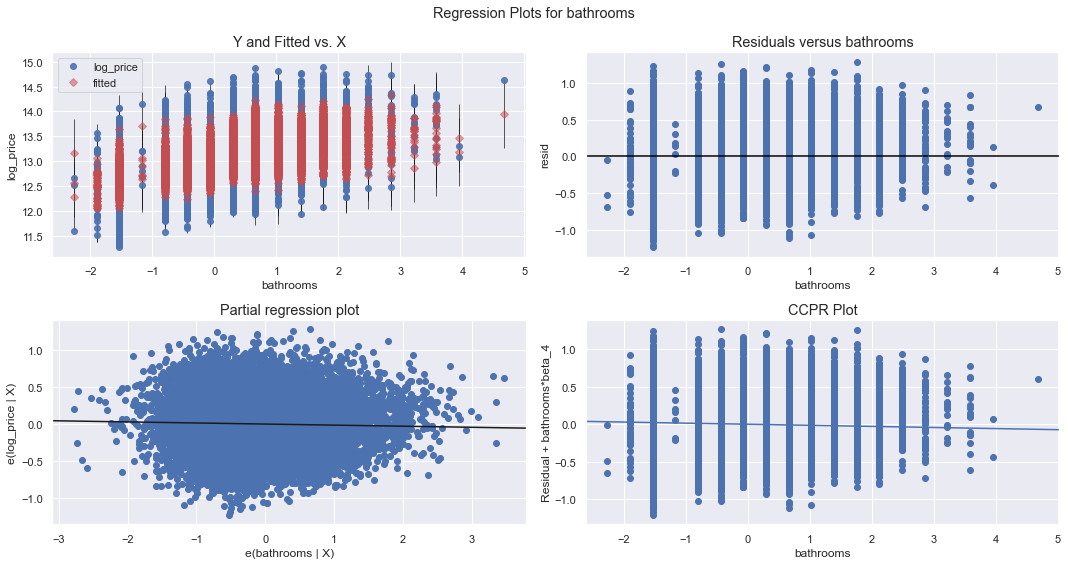

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "bathrooms", fig=fig)
plt.show()

This is how we'd expect our final model to perform.  We made these changes to the final model to satisfy the assumptions of linear regression. The four independent variables are homoscedastic by the graphs above meaning the variance doesn't increase as the independent variable gets bigger or smaller. We also know that these aren't collinear given the correlation graph we used above. 

This graph shows the imrprovement in RMSE as we've tweaked each model!!

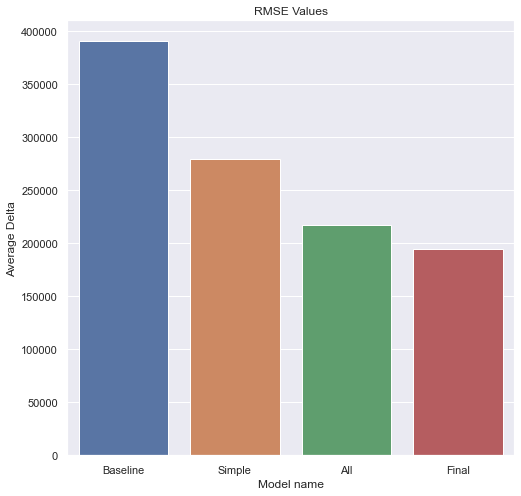

In [52]:
RMSE_values = [390395, 279487, 217267, 194053]
baseline_names =['Baseline', 'Simple', 'All', 'Final']


plt.bar(baseline_names, height=RMSE_values)
plt.title('RMSE Values')
plt.xlabel('Model name')
plt.ylabel('Average Delta')

;

sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(x=baseline_names, y=RMSE_values).set(title='RMSE Values', xlabel='Model name', ylabel='Average Delta');

## Conclusion

After analyzing this King County data, our final model would suggest the main factors in increasing property value to be sqft of the property as well as it’s grade. Grade is referring to the classification based on a structures construction quality. This mainly has to do with the types of materials used and the quality of the work done. Buildings that get better grades often cost more to build per unit of measure howevever we deem that investment profitale as properties that do grade higher, command higher value. Our model does however have it’s faults. Our final models R^2 was 48% with an RMSE of $194,053. Linear regression was probably not the best tool to use to get the most out of this data set so in the future we would like to use different more powerful machine learning tools in order to make this a more accurate predictive model.